# Notebook 18: The Bootstrap 
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [2]:
import numpy as np 
from scipy import stats
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

### Exercise 1 - Bootstrapped Confidence Intervals for the Mean 
*** 

In this exercise you will experiment with empirical bootstrap techniques to compute confidence intervals for the mean of the exponential distribution with parameter $\lambda = 5$.  

**Part A**: Write down the expected value, variance, and standard deviation of $X \sim Exp(5)$.  You can look them up on [Wiki](https://en.wikipedia.org/wiki/Exponential_distribution) if you need to. 

**Solution**: 

$f(x, \lambda) =
    \begin{cases}
       \lambda e^{-\lambda x} &, \phantom{xx}x\geq0\\
       0 &, \phantom{xx}x<0
       \end{cases}$

We have 

$$
E[X] = \frac{1}{\lambda} = \frac{1}{5} = 0.2, \quad \textrm{Var}(X) = \frac{1}{\lambda^2} = \frac{1}{25} = 0.04, \quad \textrm{SD}(X) = \frac{1}{\lambda} = \frac{1}{5} = 0.2  
$$

**Part B**: The variable $\texttt{sample}$ below consists of $500$ samples from $Exp(5)$.  Complete the function bootstrapped_mean below, to draw at least $5000$ bootstrapped resamples (with replacement) from the empirical distribution defined by $\texttt{sample}$ and compute a bootstrapped confidence interval for the mean at the 95% confidence level.  

In [5]:
# 'sample' is an array holding 500 random draws from an Exp(5) distribution.
sample = np.random.exponential(1/5, size=500)
type(sample)
len(sample)

500

In [4]:
# This function will graph a histogram of the data, the bootleg CI,
#  the actual mean of the data, and return the values in the CI.
def bootstrapped_mean(sample, num_boots=5000):

    # 'b' is an array that holds 5000 means acquired from 5000 bootstrap samples of size 500.
    # Each sample of course had replacement.
    b = np.array([np.mean(np.random.choice(sample, replace=True, size=len(sample))) for ii in range(num_boots)])
    
    # The line below is the same as:
    # L = np.percentile(b,2.5)
    # U = np.percentile(b,97.5)
    L, U = np.percentile(b, 2.5), np.percentile(b, 97.5)
    
    # 'CI' is an array holding the 'L' and the 'U' from above.
    CI = np.array([L, U])
    
    return CI 

# Call the function.
bootstrapped_mean(sample)

array([0.18325597, 0.22003993])

**Part C**: Use the sample mean of $\texttt{sample}$ and the known standard deviation of the distribution to compute a traditional 95% confidence interval for the mean of the distribution.  Compare your traditional confidence interval to the bootstrapped confidence interval returned by your code. 

**Solution**: We know that the standard deviation of the population is $\sigma = 1/\lambda = 0.2$.  At the 95% confidence level, the traditional confidence interval is 

In [4]:
from scipy.stats import norm 
z = norm.ppf(0.975)
sig = 0.2 
CI = [np.mean(sample) + flip*z*sig/np.sqrt(len(sample)) for flip in [-1,1]]
print("Traditional 95% Confidence Interval: [{:.3f}, {:.3f}]".format(CI[0], CI[1]))

Traditional 95% Confidence Interval: [0.189, 0.224]


**Part D**: Modify the code you wrote in **Part B** to also plot a histogram of the bootstrapped sample means along with some graphical representation of the calculated confidence interval. 

array([0.18966297, 0.22413444])

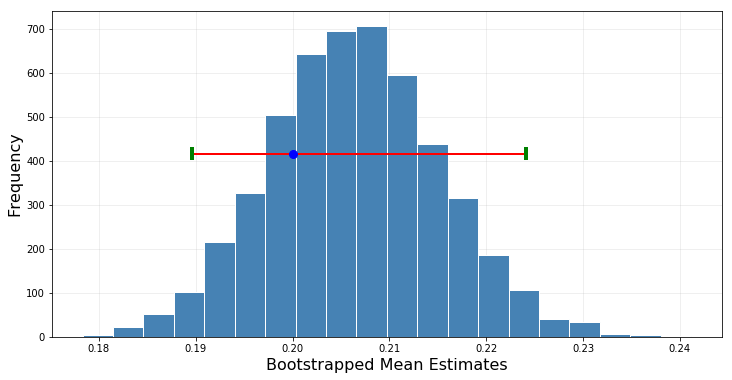

In [5]:
# This function will graph a histogram of the data, the bootleg CI,
#  the actual mean of the data, and return the values in the CI.
def bootstrapped_mean(sample, num_boots=5000):

    # 'b' is an array that holds 5000 means acquired from 5000 bootstrap samples of size 500.
    # Each sample of course had replacement.
    b = np.array([np.mean(np.random.choice(sample, replace=True, size=len(sample))) for ii in range(num_boots)])
    
    # The line below is the same as:
    # L = np.percentile(b,2.5)
    # U = np.percentile(b,97.5)
    L, U = np.percentile(b, 2.5), np.percentile(b, 97.5)
    
    # 'CI' is an array holding the 'L' and the 'U' from above.
    CI = np.array([L, U])
    
    # Initialize the plot
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    
    # Make a histogram out of 'b'.
    pd.Series(b).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    
    # Make the graph pretty.
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped Mean Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    # The code below plots three lines. one horizontal, two vertical.
    # [x_1 value, x_2 value] , [y_1 value, y_2 value],  line color, line thickness
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=2)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="green", lw=4)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="green", lw=4)
    
    # This is a point on the actual (known) expected value
    plt.plot([.2], [num_boots/12], marker='o', markersize=8, color="blue")

    return CI 

# Call the function.
bootstrapped_mean(sample)

### Exercise 2 - Bootstrapped Confidence Intervals for the Variance
*** 

In this exercise you will experiment with empirical bootstrap techniques to compute confidence intervals for various statistics of the variance of the exponential distribution with parameter $\lambda = 5$.  

**Part A**: Complete the function bootstrapped_var below, to draw at least $5000$ bootstrapped samples (with replacement) from the empirical distribution defined by $\texttt{sample}$ and compute a bootstrapped confidence interval for the variance at the 95% confidence level.  You should be able to copy paste your code from Exercise 1. Use your function to find the 95% bootstrapped CI for the data stored in $\texttt{sample}$ from Exercise 1. 

array([0.03089578, 0.04989027])

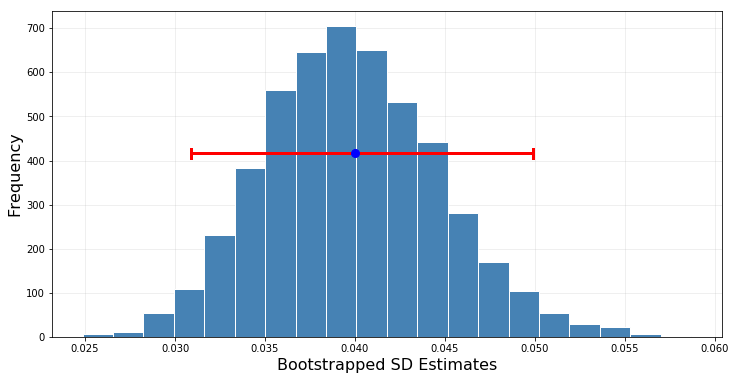

In [33]:
# This function will graph a histogram of the data, the bootleg CI,
#  the actual variance of the data, and return the values in the CI.
def bootstrapped_var(sample, num_boots=5000):
    
    # 'b' is an array holding 'num_boots' amount of  std's from bootstrapped samples of
    #  'sample', each the same size and with replacement. 
    #std = np.std(np.random.choice(sample, replace=True, size=len(sample)))
    #vr = std**2
    b = np.array([np.var(np.random.choice(sample, replace=True, size=len(sample))) for ii in range(num_boots)])
    
    # The following code is the same as the following two lines.
    #L = np.percentil(b, 2.5)
    #U = np.percentile(b, 97.5)
    L, U = np.percentile(b, 2.5), np.percentile(b, 97.5)
    
    # 'CI' is an array holding the Lower and Upper numbers of the desired CI.
    CI = np.array([L, U])
    
    # Initialize the graph.
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    
    # Make a histogram out of 'b'.
    pd.Series(b).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=False)
    
    # Make the graph pretty.
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("Bootstrapped SD Estimates", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    
    # Plot a horizontal line for the calculated CI.
    ax.plot([CI[0], CI[1]], [num_boots/12, num_boots/12], color="red", lw=3)
    ax.plot([CI[0], CI[0]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    ax.plot([CI[1], CI[1]], [num_boots/12-10, num_boots/12+10], color="red", lw=3)
    
    # Plot the actual known variance (0.04) for comparison to the CI.
    plt.plot([.04], [num_boots/12], marker='o', markersize=8, color="blue")

    return CI 
    
bootstrapped_var(sample)

**Part B**: Does your 95% bootstrapped confidence interval cover the true variance of the population? 

Solution: The blue dot is the actual variance, and it is seen within the bounds of the CI.

### Exercise 3 - Empirical Coverage of Bootstrapped Confidence Intervals  
*** 

Complete the function CI_test below to test the coverage of the bootstrapped confidence intervals at the 95% confidence level for the mean of the population that $\texttt{sample}$ is drawn from.  Recall that you know that the true sample mean is $1/\lambda = 0.2$.  

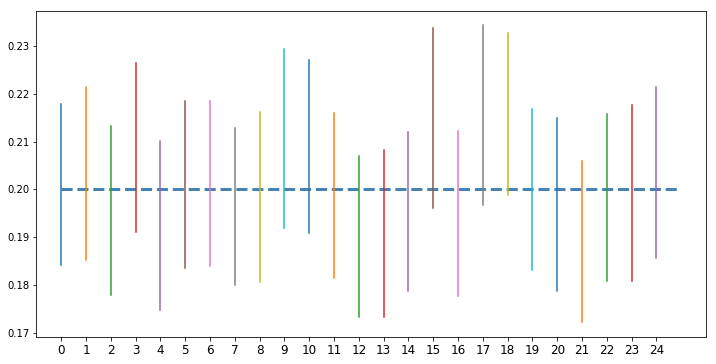

In [17]:
# This function will create a graph of numerous CI's
def CI_test(num_CIs=100, num_boots=5000):
    
    # Initialize the plot.
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    
    # This is the known mean of the distribution.
    mean = 0.2
    
    # Plot a horizontal line marking the height of the known mean.
    ax.plot([0,num_CIs], [mean, mean], color="steelblue", ls='--', lw=3)
    
    # This for-loop graphs 'num_CIs' amount of vertical lines representing CI's.
    for jj in range(num_CIs):
        
        # 'sample' holds 'size' amount of random selections from an exponential with
        #  a mean of 1/5 = 0.2.
        sample = np.random.exponential(1/5, size=500)
        
        # This is an array to hold the sampled means.
        list_of_means = []
        
        # This for-loop creates the array of re-sampled (bootstrapped) means.
        for ii in range(num_boots):
            
            # 'resample_mean' is an array holding bootstrap samples (random) from 'sample'.
            resample_mean = np.random.choice(sample, size=len(sample), replace=True)
            # 'boot_mean' holds the mean of 'resample_mean'.
            boot_mean = resample_mean.mean()
            # add the new mean to the array 'list_of_means'.
            list_of_means.append(boot_mean)
    
        # Compute the 2.5 and 97.5th percentiles of the list of bootstrapped variances
        L = np.percentile(list_of_means, 2.5)
        U = np.percentile(list_of_means, 97.5)

        # Your 95% confidence interval estimate is given by these percentiles
        CI = np.array([L, U])
        ax.plot([jj, jj], [L, U])
    
    # Make the graph pretty    
    ax.set_xlim([-1,num_CIs+1])
    plt.xticks(range(num_CIs), fontsize=12)

# Call the function to create 25 CI's.
CI_test(num_CIs=25, num_boots=5000)


### Exercise 4 - Parametric Bootstrap for the Exponential Parameter 
*** 

In this exercise you will experiment with the parametric bootstrap technique to compute $\color{red}{\text{confidence intervals for various statistics}}$ of the exponential distribution with parameter $\lambda = 5$.  

**Part A**: Complete the function bootstrapped_lam below, to draw at least $5000$ bootstrapped resamples (with replacement) from the empirical distribution defined by $\texttt{sample}$ and compute a bootstrapped confidence interval for the exponential parameter $\lambda$.  Note that a good estimator for $\lambda$ is $1/x$ where $x$ is assumed to come from $Exp(\lambda)$. 

In [19]:
# This function returns a CI for lambda
def bootstrapped_lam(sample, num_boots=5000):
    
    # create an array
    list_of_lams = []
    
    # Gather the bootstrap samples.
    for i in range(0,num_boots):
        # 'resample' is an array holding 500 random selections from an Exp(5).
        resample = np.random.exponential(1/5, size=500)
        # 'resample_mean' is an array holding the means of 'resample'.
        resample_mean = resample.mean()
        # 'lambda_resample' is an array holding the inverse of the values in 'resample'.
        lambda_resample = 1/resample_mean
        # Now add these values to the array.
        list_of_lams.append(lambda_resample)
        
    # These are the Lower and Upper values of the CI.    
    L = np.percentile(list_of_lams,2.5)
    U = np.percentile(list_of_lams,97.5)
    
    # 'CI' is the array holding 'L' and 'U'.
    CI = [L, U]
    
    return CI 

# Call the function.
bootstrapped_lam(sample)

# Recall lambda is 0.2 so 1/lambda is 5.

[4.595554448273116, 5.4538341816083635]

**Part B**: Complete the function parametric_stdev below, to draw at least $5000$ bootstrapped resamples (with replacement) from the empirical distribution defined by $\texttt{sample}$.  From each bootstrapped resample, estimate the exponential parameter $\lambda$, then transform the estimate of $\lambda$ to the variance of the exponential distribution.  With your bootstrapped estimates of $\sigma$, compute a 95% confidence interval for the variance.  How does this confidence interval compare to the one computed in Exercise 2? 


In [32]:

def parametric_stdev(sample, num_boots=5000):
    
    list_of_sigs = []
    
    # This for-loop creates a distribution of sample variances.
    for i in range(0,num_boots):
        
        # 'resample' is an array containing 'size' amount of 
        #   random selections from an Exp(5).
        resample = np.random.exponential(1/5, size=500)
        
        # 'sigma' is a variable holding the std of
        #  the 'size' amount of values in 'resample'.
        sigma = resample.std(ddof=1)
        
        # 'boot_variance' is a variable holding the variance of 
        #  the 'size' amount of values in 'resample'.
        boot_variance = sigma**2
        
        # When the loop finishes, this array will hold the
        #  'num_boots' amount of variances,
        #  a.k.a. our distribution of variances.
        list_of_sigs.append(boot_variance)
        
    # The endpoints of our CI calculated from the distribution 'list_of_sigs'.
    L = np.percentile(list_of_sigs,2.5)
    U = np.percentile(list_of_sigs,97.5)
    
    CI = [L, U]
    return CI

# Call the function.
parametric_stdev(sample)


[0.030701229604012194, 0.0509208416096855]